In [3]:
#Importamos librerías importantes a usar
import numpy as np
from scipy.integrate import solve_ivp
from scipy import constants as ctes
import matplotlib.pyplot as plt

%matplotlib inline
#para que se vean bien los gráficos en jupyter notebook:

# Modelo y análisis de Leine et al. 2009

Required step size is less than spacing between numbers.


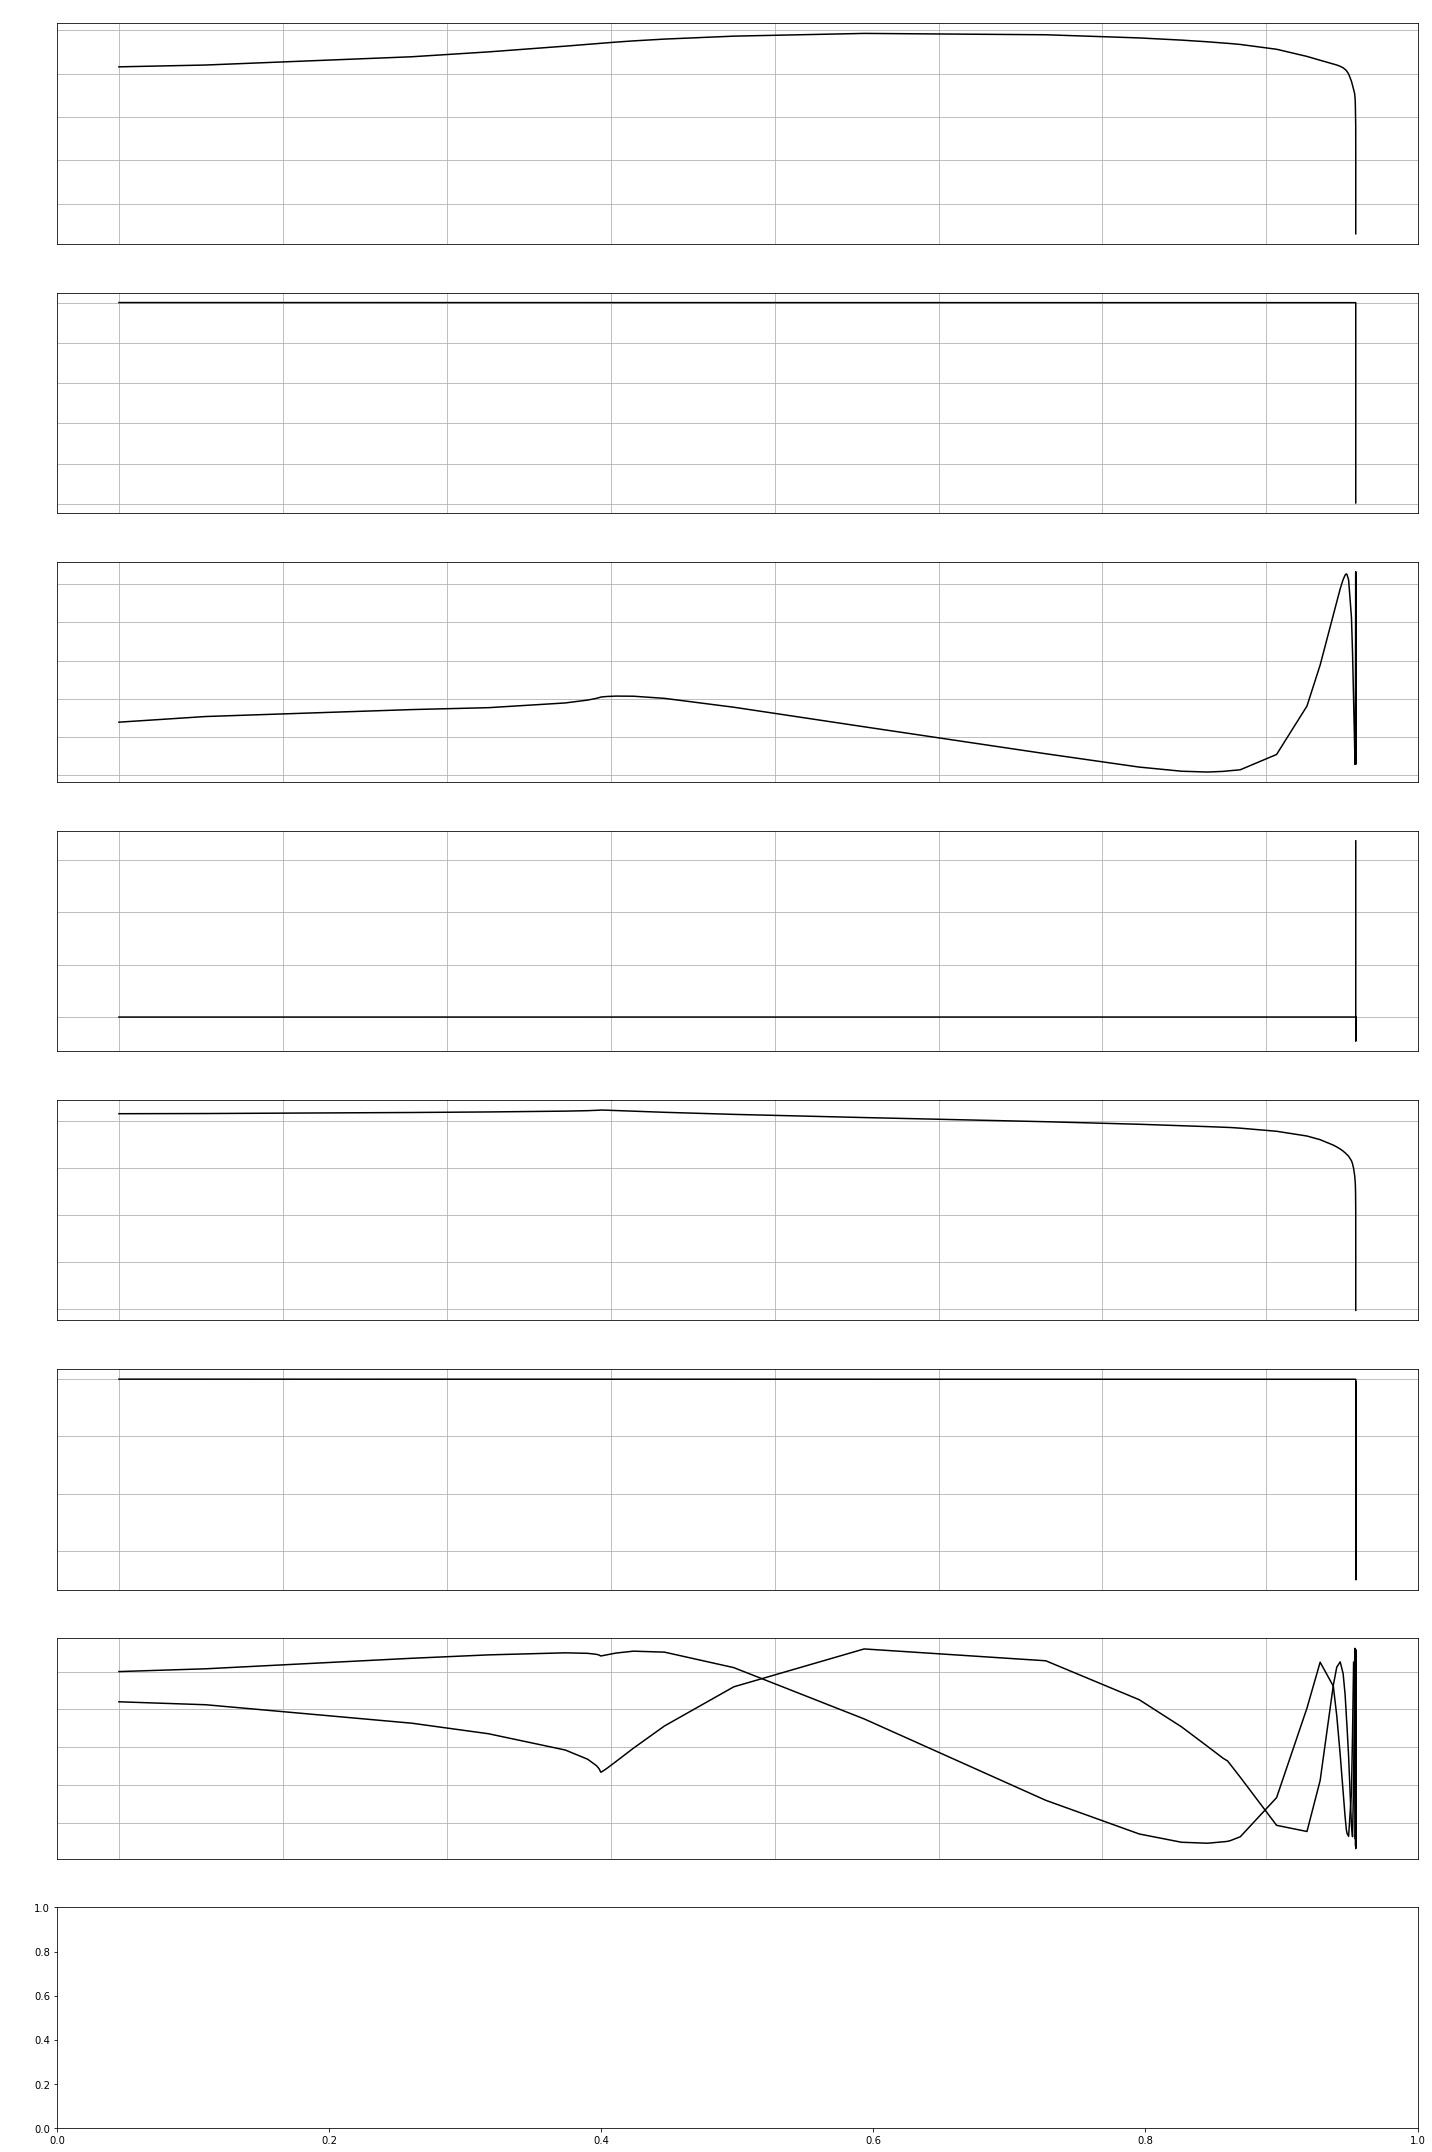

In [4]:
#Definimos el modelo como un sistema de odes de 1 orden.
def leine(t,cond_init,k1,k2,eps,gn,rr):

    #Dejo esto para usar más adelante
    Fx_diss = 0
    Fy_diss = 0
    Fz_diss = 0

    #Condiciones iniciales del sistema
    Beta,wB,Gamma,wG,Alfa,wA,x,y = cond_init

    omegaB = wB
    omegaG = wG
    omegaA = wA
    domegaB = (1 / (k1 + 1 + np.square(eps))) * (Fx_diss + gn * (np.sin(Beta) - eps * np.cos(Beta)) - (np.cos(Beta) * (k2 + 1 + eps * np.tan(Beta))) * omegaG * omegaA - ((k2 + 1 + eps * np.tan(Beta)) * np.sin(Beta) * np.cos(Beta) + ((k1 + np.square(eps)) * np.tan(Beta) + eps) * np.square(np.cos(Beta))) * np.square(omegaA))
    domegaA =  (1 / (1 +  (((k2 + 1) * np.sin(Beta) - eps * np.cos(Beta)) / (k2 + 1)) * (eps / ((k1 + np.square(eps)) * np.cos(Beta) - np.sin(Beta))))) * (1 / ((k1 + np.square(eps)) * np.cos(Beta) - np.sin(Beta))) * (Fz_diss + eps * ((Fy_diss / (k2 + 1)) - ((eps * np.sin(Beta) + (k2 + 2 + eps * np.tan(Beta)) * np.cos(Beta)) / (k2 + 1)) * omegaA * omegaB) - ((k2 - k1 + np.square(eps)) * np.sin(Beta) - ((k1 + np.square(eps)) * np.tan(Beta) + 2 * eps) * np.cos(Beta)) * omegaA * omegaB - k2 * omegaG * omegaB)
    domegaG = (1 / (k2 + 1)) * (Fy_diss - ((k2 + 1) * np.sin(Beta) - eps * np.cos(Beta)) * domegaA - (eps * np.sin(Beta) + (k2 + 2 + eps * np.tan(Beta)) * np.cos(Beta)) * omegaA * omegaB)

    #these hold only for pure rolling i.e. rolling without slipping
    vx = rr * omegaG + (y + 2 * rr * np.sin(Beta)) * omegaA
    vy = -omegaA * x

    return omegaB,domegaB,omegaG,domegaG,omegaA,domegaA,vx,vy

#seteamos las condiciones iniciales
x_0 = 0.5
y_0 = 0.3 #en m?
Beta = np.pi / 4  # Empezamos a 22.5 grados
omegaB_O = 2 * np.pi
Gamma = np.pi / 8
omegaG_O = 2 * np.pi
Alfa = np.pi / 2
omegaA_O = np.pi / 5
cond_init = [Beta,omegaB_O,Gamma,omegaG_O,Alfa,omegaA_O,x_0,y_0]

######################################
##seteamos los parametros del modelo##
######################################

m = 0.4499   #masa del modelo en kg
r_0 = 0.0381 #radio del disco en [m] <- 75.5 mm / 2
r = 0.035    #radio de rodadura     <- 70 mm no se de donde lo saco a este
h = 0.00635  #Ancho del disco en [m]  <-  12.7 mm / 2
g = ctes.g   #Constante gravitacional

#Momentos de inercia de los ejes principales
I_11 = (1 / 4) * m * np.square(r_0) + (1 / 12) * m * np.square(h)
I_22 = I_11
I_33 = (1 / 2) * m * np.square(r_0)
norm_I = m * np.square(r)

#Calculamos los parametros usados finalmente.
k_1 = I_11 / norm_I
k_2 = I_33 / norm_I
epsilon = h / r
g_norm = g / r

leine_args = [k_1,k_2,epsilon,g_norm,r]

#Definimos un intervalo de 40 segundos
time = np.linspace(0,40,100)

#Resolvemos el sistema
leine_sol = solve_ivp(leine, t_span=(0.,40.),y0=cond_init, args=leine_args)

print(leine_sol.message)
np.shape(leine_sol.y)



#theta,phi,psi,a,b,vo,v1,v2
#Ploteamos el resultado
#Armamos la figura de 8 filas y una columna
fig1, axs = plt.subplots(nrows=8,ncols=1,figsize = (20,30))
col2 = 'white'

#Ploteamos Beta(t)
axs[0].plot(leine_sol.t,leine_sol.y[0,:],'k')
axs[0].set_title('Beta(t)',color= col2,fontsize = 14)
axs[0].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[0].grid(True)

#ploteamos theta'(t)
axs[1].plot(leine_sol.t,leine_sol.y[1,:],'k')
axs[1].set_title('dBeta(t)',color=col2,fontsize = 14)
axs[1].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[1].grid(True)

#Ploteamos Gamma(t)
axs[2].plot(leine_sol.t,leine_sol.y[2,:],'k')
axs[2].set_title('Gamma(t)',color=col2,fontsize = 14)
axs[2].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[2].grid(True)

#Ploteamos phi'(t)
axs[3].plot(leine_sol.t,leine_sol.y[3,:],'k')
axs[3].set_title('dGamma(t)',color=col2,fontsize = 14)
axs[3].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[3].grid(True)

#ploteamos psi
axs[4].plot(leine_sol.t,leine_sol.y[4,:],'k')
axs[4].set_title('alfa(t)',color=col2,fontsize = 14)
axs[4].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[4].grid(True)

#plteamos psi'(t)
axs[5].plot(leine_sol.t,leine_sol.y[5,:],'k')
axs[5].set_title('dalfa(t)',color=col2,fontsize = 14)
axs[5].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[5].grid(True)

#Ploteamos x
axs[6].plot(leine_sol.t,leine_sol.y[6,:],'k')
axs[6].set_title('x(t)',color=col2,fontsize = 14)
axs[6].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[6].grid(True)

#Ploteamos y
axs[6].plot(leine_sol.t,leine_sol.y[7,:],'k')
axs[6].set_title('y(t)',color=col2,fontsize = 14)
axs[6].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[6].grid(True)

fig1.tight_layout()

# Modelo de Cendra y Díaz et al. 2007

def cendra(t,cond_init,M,rr,e,g,I1,I3):

    #seteamos las condiciones iniciales del sistema
    theta,a,phi,b,psi,vo,v1,v2 = cond_init

    #algunas constantes
    r_s = np.square(rr)
    e_s = np.square(e)

    #calculamos el sistema
    theta_pto = a
    phi_pto = b
    psi_pto = vo
    a_pto = (1 / ((4 * I1) + M * r_s * (4 + e_s))) * (-2*e*M*r_s*np.cos(2*theta)*np.square(b) + 2*(M*g*r*e - 2*b*(I3 + M*r_s)*vo) * np.sin(theta) + (-2*M*r*(2*g + e*r*b*vo) + np.square(b) * np.sin(theta) * (4*I1 - 4*I3 + (-4 + e_s)*M*r_s)) * np.cos(theta))
    b_pto = ((-2 * a) / (4*I1*I3 + M*r_s*(4*I1 + I3*e_s))) * (e*b*I3*M*r_s + (b/np.tan(theta)) * (4*I1*(I3 + M*r_s) + I3*(-2*I3 + (-2 + e_s)*M*r_s)) - 2*I3*(I3 + M*r_s)*vo*(1/np.cos(theta)))
    vo_pto = (1 / (8*I1*I3 + 2*M*r_s*(4*I1 + I3*e_s))) * (a*(1/np.cos(theta))*(4*b*I3*(3*I1 - I3) +b*M*r_s*(16*I1 + I3*(-4 + 3*r_s)) - 8*I3*(I3 + M*r_s)*vo*np.cos(theta) + b*I3*(4*I1 - 4*I3 + M*r_s*(-4 +e_s))*np.cos(2*theta) + 4*e*I3*M*r_s*(vo + 2*b*np.cos(theta))*np.sin(theta)))
    #acceleration of the point of contact
    v11_pto = (1 / (4*I1*I3 + M*r_s*(4*I1 + I3*e_s))) * (a*r*np.cos(phi)*(-2*I3*M*r_s*e*(vo +2*b*np.cos(theta)) + 4*I3*(I3 +M*r_s)*vo*(1/np.tan(theta)) - 2*b*(4*I1*(I3 + M*r_s) + I3*(-2*I3 + (-2 +e_s)*M*r_s))*(1/np.cos(theta)) + I3*b*(4*I1 - 4*I3 + (-4 + e_s)*M*r_s)*np.sin(theta)) + b*r*(4*I1*I3 + (4*I1 + I3*e_s)*M*r_s)*vo*np.sin(phi))
    v12_pto = (-1 / (8*I1*I3 + 2*M*r_s*(4*I1 + I3*e_s))) * (2*b*r*(4*I1*I3 + (4*I1 + I3*e_s)*M*r_s)*vo*np.cos(phi) + (a*r / np.cos(theta)) * (4*b*(3*I1 -I3)*I3 +  b*(16*I1 + (-4 +3*e_s)*I3)*M*r_s - 8*I3*(I3 + M*r_s)*vo*np.cos(theta) + b*I3*(4*I1 - 4*I3 + (-4 + e_s)*M*r_s)*np.cos(2*theta) + 4*I3*e*M*r_s*(vo + 2*b*np.cos(theta))*np.sin(theta)) * np.sin(phi))

    return theta_pto,phi_pto,psi_pto,a_pto,b_pto,vo_pto,v11_pto,v12_pto

##############################
#definimos condiciones iniciales
theta_0 = np.pi / 8
phi_0 = 2.
psi_0 = 3.
dtheta_0 = 2.
dphi_0 = 5.
dpsi_0 = 3.
v11 = 3
v12 = 3
cond_iniciales = [theta_0,dtheta_0,phi_0,dphi_0,psi_0,dpsi_0,v11,v12]

#Seteamos los valores de los parametros a usar
M = 0.4499 # en kg
r = 0.0755 # [m]
e = 0.0127 # [m]
g = ctes.g
I1 = (1 / 4) * M * np.square(r) + (1 / 12) * M * np.square(e/2)
I3 = (1 / 2) * M * np.square(r)

parameters = [M,r,e,g,I1,I3]
## definimos el span de tiempo a tomar
time = np.linspace(0,15,1000) #Definimos un intervalo de 40 segundos

#Resolvemos el modelo de cendra

cendra_sol = solve_ivp(cendra,t_span=[0,0.2],y0=cond_iniciales,args=parameters)

print(cendra_sol.message)
np.shape(cendra_sol.y)



#theta,phi,psi,a,b,vo,v1,v2
#Ploteamos el resultado
#Armamos la figura de 8 filas y una columna
fig2, axs = plt.subplots(nrows=8,ncols=1,figsize = (20,30))
col2 = 'white'

#Ploteamos theta(t)
axs[0].plot(cendra_sol.t,cendra_sol.y[0,:],'k')
axs[0].set_title('theta(t)',color= col2,fontsize = 14)
axs[0].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[0].grid(True)

#ploteamos theta'(t)
axs[1].plot(cendra_sol.t,cendra_sol.y[1,:],'k')
axs[1].set_title('dtheta(t)',color=col2,fontsize = 14)
axs[1].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[1].grid(True)

#Ploteamos phi(t)
axs[2].plot(cendra_sol.t,cendra_sol.y[2,:],'k')
axs[2].set_title('phi(t)',color=col2,fontsize = 14)
axs[2].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[2].grid(True)

#Ploteamos phi'(t)
axs[3].plot(cendra_sol.t,cendra_sol.y[3,:],'k')
axs[3].set_title('dphi(t)',color=col2,fontsize = 14)
axs[3].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[3].grid(True)

#ploteamos psi
axs[4].plot(cendra_sol.t,cendra_sol.y[4,:],'k')
axs[4].set_title('psi(t)',color=col2,fontsize = 14)
axs[4].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[4].grid(True)

#plteamos psi'(t)
axs[5].plot(cendra_sol.t,cendra_sol.y[5,:],'k')
axs[5].set_title('dpsi(t)',color=col2,fontsize = 14)
axs[5].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[5].grid(True)

#Ploteamos V11
axs[6].plot(cendra_sol.t,cendra_sol.y[6,:],'k')
axs[6].set_title('V11',color=col2,fontsize = 14)
axs[6].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[6].grid(True)

#Ploteamos V12
axs[6].plot(cendra_sol.t,cendra_sol.y[7,:],'k')
axs[6].set_title('V12',color=col2,fontsize = 14)
axs[6].tick_params(axis = 'both', which = 'both', color = col2, labelcolor = col2,labelsize = 14)
axs[6].grid(True)

fig2.tight_layout()